In [1]:
%matplotlib inline

# String-searching algorithms - 4 BIM
### Sergio Peignier (sergio.peignier@insa-lyon.fr)
+ Let $A=\{a_1,a_2,...\}$ be an alphabet of letters
+ Let  $T=(t_1,t_2,... \; | \;\forall t_i \in A)$ be a string with size $|T|$
+ Let $S=(s_1,s_2,... \; | \;\forall s_i \in A)$ be a string with size $|M|$
+ Let $S[i] = s_i$ being the letter at position $i$ in string $S$
+ Let $S[i,j] = (s_i,...s_j)$ being the substring of $S$ between positions $i$ and $j$
+ Let $S[1,j] $ being a prefix of $S$
+ Let $S[j,n] $ being a suffix of $S$

# 1) Impact of alphabet size and sequence length on similarity
+ Let $T$ and $S$ be two random strings, let $A$ be their alphabet, and let $|T| = |S|$.
+ Let $d(T,S) = |\{i \quad \forall i \in \{1,..., |S|\} \; | \; T[i]\neq S[i])$ be the Hamming distance between $T$ and $S$, i.e., number of positions where both strings differ.  
+ Compute the probability that $d(T,S)=k$, given that $T$ and $S$ are two random strings, assuming that the probabilities of drawing the string letters are $i.i.d.$, and assuming equiprobability 
+ Plot this probability as a function of $|T|$ and $|A|$
+ Write down your conclusions and interpretation

## Answer
The probability that the i-th element of $T$ and $S$ are both equal to an element $c$ is $P(T[i]=c \text{ and } P(S[i]=c) = P(T[i]=c) \times P(S[i]=c) = \frac{1}{|A|^2}$
This is the same for each element in $A$. Then, $P(T[i]=S[i]) = P(T[i] = c \text{ and } S[i]=c \quad \forall c \in A) = \sum_c P(T[i]=c \text{ and } P(S[i]=c) = \sum_c \frac{1}{|A|^2} = \frac{1}{|A|}$

Then, for two independent random sequences $S$ and $T$, their i-th elements are the same with a probability of $P(T[i]=S[i]) = \frac{1}{|A|}$ and thus $P(T[i]\neq S[i]) = 1-\frac{1}{|A|}$

The number of locations $i$ such that $T[i]=S[i]$ follows a binomial distribution with parameters $\mathcal{B}(\frac{1}{|A|}, |T|)$

And consequently the distance between $d(T,S)$ follows a binomial distribution with parameters $\mathcal{B}(1-\frac{1}{|A|}, |T|)$



In [2]:
from scipy.stats import binom
import pandas as pd
k = 2
results = []
for alphabet_size in [2,4,10,50]:
    for sequence_length in range(1,1000,10):
        p = 1 - (1 / alphabet_size)
        n = sequence_length
        distribution = binom(n, p)
        prob = distribution.logpmf(k)
        results.append([p,n,prob])
results = pd.DataFrame(results)
results.columns = ["$\\frac{|A|-1}{|A|}$","$|T|$","$P(d(S,T)=1)$"]

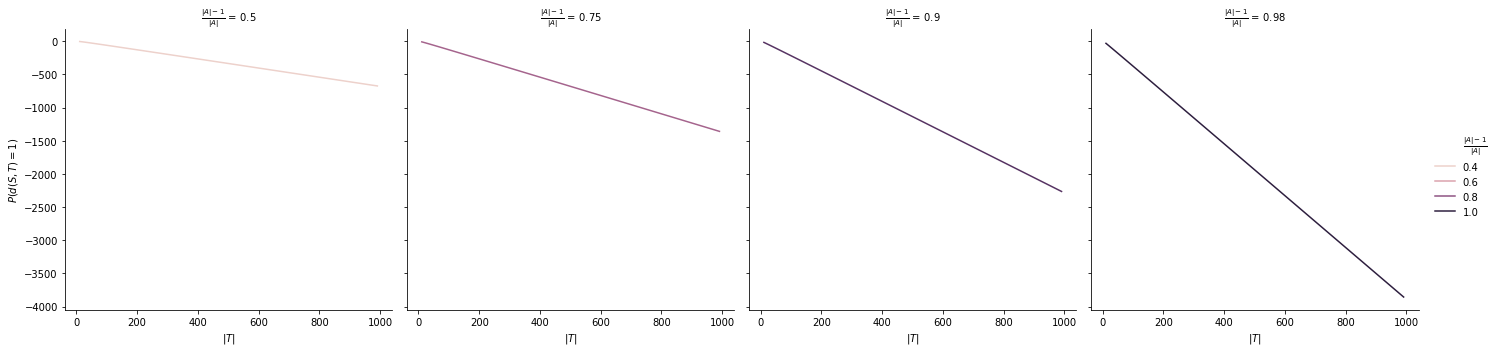

In [3]:
import seaborn as sns
sns.relplot(
    data=results, x="$|T|$", y="$P(d(S,T)=1)$",
    col="$\\frac{|A|-1}{|A|}$", hue="$\\frac{|A|-1}{|A|}$",
    kind="line"
)

# 2) String Search Problem Statement - Naive algorithm

Given $S$ and $T$ being two strings as defined previously, and assuming $|S| < |T|$

**Problem**: is $S$ a sub-string of $T$?

+ Write down the mathematical formulation of this problem
+ Write another possible problem derived from the aforementioned one

The following naive Python code (next box) tackles this problem, and returns the location of the first instance of $S$ in $T$

+ Compute its complexity (assuming $n = |S|$ and $m = |T|$)
+ Write a function to generate random DNA sequences with a given length. 
+ Estimate the time taken by the previous algorithm to search a string $S$ in a document $T$, as a function of the sizes $n$ and $m$.
+ Compare the algorithm's real behavior w.r.t. its complexity, can you write a new algorithm, that would deliver worse results? 

+ Let us consider the following simple procedure to compare two large strings $T_1$ and $T_2$:
    + Split $T_1$ in $N$ small fragments of size $n$
    + Search each one of the $N$ fragments of $T_1$ in $T_2$

Given that the human genome contains $~ 3 \times 10^9$ bps, and the dog genome contains $~ 2.5 \times 10^9$ bps, and taking $n=50$. How many operations does this procedure need to execute? Evaluate the time taken by a single comparison operation, how long would it take to compare both genomes with this simple procedure?

In [4]:
import numpy as np
def random_DNA_generator(size,alphabet=["A","T","G","C"]):
    return "".join(list(np.random.choice(alphabet, size=size, replace=True)))

In [5]:
def naive_string_search(T,S):
    for i in range(len(T) - len(S)):
        j = 0
        while j < len(S) and T[i+j] == S[j]:
            j += 1
        if j == len(S):
            return(i)

In [6]:
random_DNA_generator(10)

'GCAAATCGGC'

In [7]:
naive_string_search("Dans l'herbe noire Les Kobolds vont. Le vent profond Pleure, on veut croire.","Kobold")

23

In [8]:
import time
import pandas as pd
results = []
for repetition in range(10):
    for n in [50,100,500,1000]:
        for m in [1000,5000,10000,15000]:
            S = random_DNA_generator(n)
            T = random_DNA_generator(m)
            start = time.time()
            naive_string_search(T,S)
            stop = time.time()
            results.append([n,m,stop-start])
results = pd.DataFrame(results,columns=["n","m","time"])

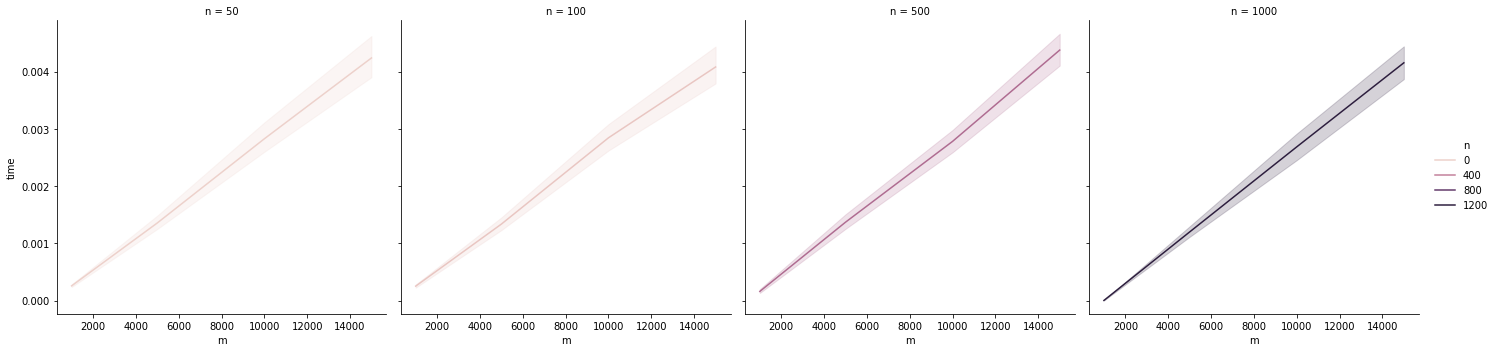

In [9]:
import seaborn as sns
sns.relplot(
    data=results, x="m", y="time",
    col="n", hue="n",
    kind="line"
)

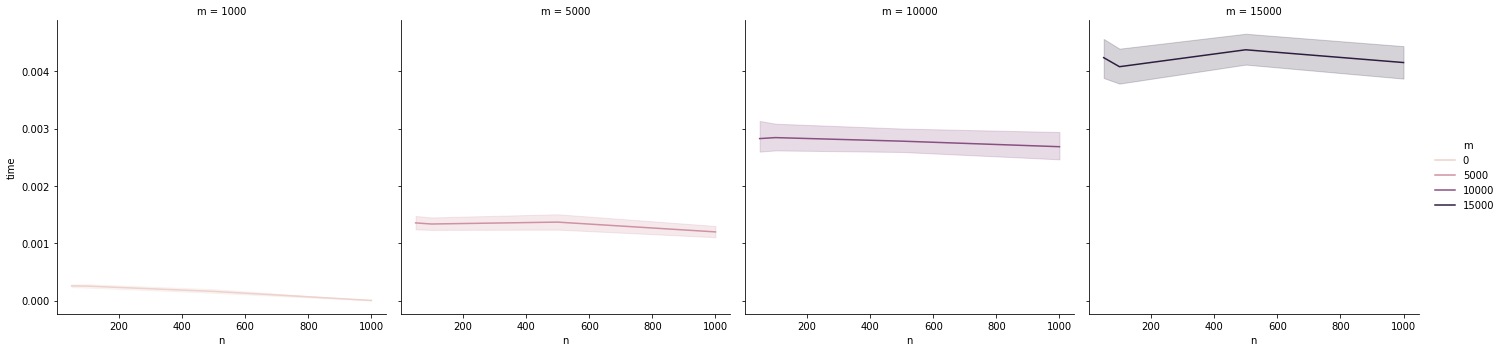

In [10]:
sns.relplot(
    data=results, x="n", y="time",
    col="m", hue="m",
    kind="line"
)

In [11]:
%timeit "A"=="T"

25.5 ns ± 0.498 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [12]:
huma_genome_size = 3e9
fragments_size = 50
nb_fragments = huma_genome_size/fragments_size
dog_genome_size = 2.5e9
operations_one_fragment_vs_dog = fragments_size*dog_genome_size
operations = nb_fragments*operations_one_fragment_vs_dog
elementary_time = 25e-9 
full_time = elementary_time * operations 

In [13]:
operations,full_time/60/60/24/365

(7.5e+18, 5945.5859969558605)

# 2) String Search Problem Statement - Indexation
## Searching in a dictionary
+ The dictionary analogy: Let $L=(w_1,w_2,\dots)$ be an ordered list of words (strings), a sort of dictionary
+ The algorithm below allows to search a word in a dictionary efficiently
+ Compute the complexity of searching a sub-string within a dictionary

In [14]:
def dichotomy_search(word,ordered_list,start=None,stop=None):
    if start is None:
        start = 0
    if stop is None:
        stop = len(ordered_list)
    search_position = int((stop+start)/2)
    if word == ordered_list[search_position]:
        return(search_position)
    if word > ordered_list[search_position]:
        return(dichotomy_search(word,ordered_list,search_position))
    else:
        return(dichotomy_search(word,ordered_list,0,search_position))
    

In [15]:
dichotomy_search("kobols",["abcs","csvsds","dsfsdf","efr","kobols","y","zer"])

4

## Storing a string as a dictionary
+ Let us consider the following naive procedure to detect a substring $S$ in a string $T$ using the dichotomy search (here $T$ could be a genome)
    + Extract all the possible substrings contained in the string $T$
    + Sort them and store them in a dictionary
    + Search the query substring within thee dictionary
+ Who many possible substrings does the string $T$ contains?
+ Do we need to store all possible substrings?
+ In fact, only storing the suffixes of $T$ is sufficient. Why? How many suffixes are there? 
+ Write a function that extracts all the suffixes of a string $T$, sorts them and returns an ordered list
+ Modify the previous code, in order to also output the list of suffixes starting indexes, a.k.a. __suffix table__
+ Determine the complexity of the suffix table construction (time) and storage (space)
+ Compute the complexity of searching a substring in such a table
+ Download a virus genome, load it, index it and launch some simple queries

The genome of the Severe acute respiratory syndrome coronavirus 2  has been downloaded from the [NCBI web page](https://www.ncbi.nlm.nih.gov/nuccore/NC_045512.2?report=fasta)

In [16]:
def suffix_list(T):
    suffix_list = [T[i:] for i in range(len(T))]
    sorted(suffix_list,reverse=True)
    return suffix_list
def suffix_table(T):
    suffix_list = [T[i:] for i in range(len(T))]
    suffix_table = sorted((e,i) for i,e in enumerate(suffix_list))
    return suffix_table
suffix_list("CACGTACGTACTA")
suffix_table("CACGTACGTACTA")

[('A', 12),
 ('ACGTACGTACTA', 1),
 ('ACGTACTA', 5),
 ('ACTA', 9),
 ('CACGTACGTACTA', 0),
 ('CGTACGTACTA', 2),
 ('CGTACTA', 6),
 ('CTA', 10),
 ('GTACGTACTA', 3),
 ('GTACTA', 7),
 ('TA', 11),
 ('TACGTACTA', 4),
 ('TACTA', 8)]

In [17]:
from Bio import SeqIO
genome = list(SeqIO.parse("data/sarscov2_genome.fasta", "fasta"))[0]

In [18]:
suffix_table_sarscov2 = suffix_table(str(genome.seq))

In [19]:
len(suffix_table_sarscov2)

29903

In [20]:
suffix_table_sarscov2[0:4]

[('A', 29902), ('AA', 29901), ('AAA', 29900), ('AAAA', 29899)]